# Data Audit

Unfortunately, twitter's free API only provides up to 7 days of tweet history, and Apple has not posted anything in that time frame. Thus, in this notebook, we are going to look exclusively at the financial data for AAPL for the last 30 days. 


Let's grab the data we put in BigQuery. Since it's not much, we can grab all of it. 

In [27]:
import google.cloud.bigquery as bq
import pandas as pd

client = bq.Client()
sql = """
    SELECT * FROM `test-project-datalab-225214.AAPL.stocks`
"""
stock_data = client.query(sql).to_dataframe()

print("There are {} rows.".format(len(stock_data)))
stock_data.head()


There are 88 rows.


,volume,timestamp,symbol,high,tradingDay,low,close,openInterest,open
0,24796300,2019-03-07 05:00:00+00:00,AAPL,174.44,2019-03-07,172.02,172.50,None,173.87
1,23999300,2019-03-08 05:00:00+00:00,AAPL,173.07,2019-03-08,169.50,172.91,None,170.32
2,32011000,2019-03-11 04:00:00+00:00,AAPL,179.12,2019-03-11,175.35,178.90,None,175.49
3,32467500,2019-03-12 04:00:00+00:00,AAPL,182.67,2019-03-12,179.37,180.91,None,180.00
4,31032500,2019-03-13 04:00:00+00:00,AAPL,183.30,2019-03-13,180.92,181.71,None,182.25


Let's see what the Null/None values are

In [28]:
stock_data.isna().sum()

volume           0
timestamp        0
symbol           0
high             0
tradingDay       0
low              0
close            0
openInterest    88
open             0
dtype: int64

It looks like openInterest field is always None. We can get rid of this field. The other fields are okay.

In [29]:
df = stock_data.copy(deep=True)
df.drop('openInterest', axis=1, inplace=True)


In [30]:
df.describe()

,volume,high,low,close,open
count,8.800000e+01,88.000000,88.000000,88.000000,88.000000
mean,3.039321e+07,188.876773,185.270000,187.345455,187.015455
std,9.274492e+06,6.886322,6.568706,6.651073,6.900465
min,1.852660e+07,173.070000,169.500000,172.500000,170.320000
25%,2.356390e+07,184.100000,182.560000,183.730000,183.900000
50%,2.885515e+07,189.659500,186.235000,188.315000,188.850000
75%,3.246750e+07,194.460000,189.810000,191.240000,191.640000
max,5.103420e+07,197.690000,195.930000,197.000000,196.450000


Our data looks good now. We can move forward with some preliminary analysis

# Data Analysis

Let's take a look at the change in closing stock price over the last 30 days

In [33]:
import matplotlib.pyplot as plt
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.index = df["timestamp"]
del df["timestamp"]
df.head()

,volume,symbol,high,tradingDay,low,close,open
timestamp,,,,,,,
2019-03-07 05:00:00+00:00,24796300,AAPL,174.44,2019-03-07,172.02,172.50,173.87
2019-03-08 05:00:00+00:00,23999300,AAPL,173.07,2019-03-08,169.50,172.91,170.32
2019-03-11 04:00:00+00:00,32011000,AAPL,179.12,2019-03-11,175.35,178.90,175.49
2019-03-12 04:00:00+00:00,32467500,AAPL,182.67,2019-03-12,179.37,180.91,180.00
2019-03-13 04:00:00+00:00,31032500,AAPL,183.30,2019-03-13,180.92,181.71,182.25


Let's view all stock data that occurred on March 11, 2019

In [36]:
df["2019-03-11"]

,volume,symbol,high,tradingDay,low,close,open
timestamp,,,,,,,
2019-03-11 04:00:00+00:00,32011000,AAPL,179.12,2019-03-11,175.35,178.9,175.49
2019-03-11 04:00:00+00:00,32011000,AAPL,179.12,2019-03-11,175.35,178.9,175.49
2019-03-11 04:00:00+00:00,32011000,AAPL,179.12,2019-03-11,175.35,178.9,175.49
2019-03-11 04:00:00+00:00,32011000,AAPL,179.12,2019-03-11,175.35,178.9,175.49


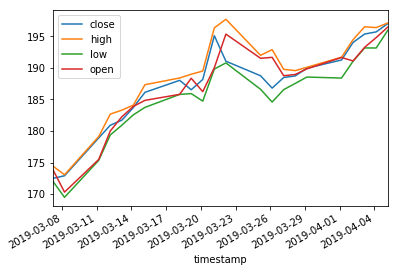

In [41]:
df.plot(y=['close','high','low','open'], use_index=True)
plt.show()

It looks like over the past 30 days, Apple's stock has overall increased. 